In [1]:
# Installs that we need
!pip install FlowCal
!pip install umap-learn


  Using cached FlowCal-1.3.0.tar.gz (82 kB)
  Created wheel for FlowCal: filename=FlowCal-1.3.0-py3-none-any.whl size=84558 sha256=ddf26b25ee28fa9b01b6cbaf8e0e91f5ef5ad4b7d0019df71b7edfdcd49d6034
  Stored in directory: c:\users\robby\appdata\local\pip\cache\wheels\07\13\c2\0b2c4dd9408195ee92a0484236c235ee16a51cdd4b493c9349
Successfully built FlowCal
  Using cached umap-learn-0.5.1.tar.gz (80 kB)
  Using cached pynndescent-0.5.2.tar.gz (1.1 MB)
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76570 sha256=60d6324b06884d5716fc4e76477c877515b9dab421504973deedf4edd1d49515
  Stored in directory: c:\users\robby\appdata\local\pip\cache\wheels\95\85\b7\b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b
  Created wheel for pynndescent: filename=pynndescent-0.5.2-py3-none-any.whl size=51353 sha256=fb97f07c0b4808d2e3a0d4697b8552edf78a88729ad43cd33689a9d045c43516
  Stored in directory: c:\users\robby\appdata\local\pip\cache\wheels\bb\81\5d\c78c8f15f3c815197129f91ec43

In [2]:
# Imports

import sys
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import FlowCal
from umap import UMAP



In [4]:
# Read in samusik_01 data

data_dir = "SamusikData/"
s01_fn = data_dir + "BM2_cct_normalized_01_non-Neutrophils.fcs"
s01 = FlowCal.io.FCSData(s01_fn)

# Only relevant indexes are 10-47
s01 = s01[:, 10:47]

# Transform data with arcsinh
s01 = np.arcsinh(s01)

In [6]:
# Perform UMAP
DR = UMAP(n_neighbors=15,min_dist=0.2,metric="euclidean",verbose=True,random_state=123)


s01_umap = DR.fit_transform(s01)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.2, random_state=123,
     verbose=True)
Construct fuzzy simplicial set
Fri Apr 16 16:34:07 2021 Finding Nearest Neighbors
Fri Apr 16 16:34:07 2021 Building RP forest with 20 trees
Fri Apr 16 16:34:09 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
	Stopping threshold met -- exiting after 6 iterations
Fri Apr 16 16:34:19 2021 Finished Nearest Neighbor Search
Fri Apr 16 16:34:21 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Apr 16 16:35:06 2021 Finished embedding


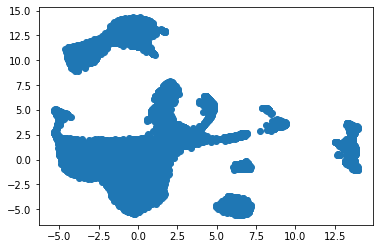

In [7]:
# Plot UMAP results
plt.scatter(s01_umap[:, 0], s01_umap[:, 1])

In [8]:
np.save("s01_umap", s01_umap)

In [11]:
# Perform tSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_iter=1000,verbose=True)
s01_tsne = tsne.fit_transform(s01)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 86864 samples in 0.631s...
[t-SNE] Computed neighbors for 86864 samples in 540.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86864
[t-SNE] Computed conditional probabilities for sample 2000 / 86864
[t-SNE] Computed conditional probabilities for sample 3000 / 86864
[t-SNE] Computed conditional probabilities for sample 4000 / 86864
[t-SNE] Computed conditional probabilities for sample 5000 / 86864
[t-SNE] Computed conditional probabilities for sample 6000 / 86864
[t-SNE] Computed conditional probabilities for sample 7000 / 86864
[t-SNE] Computed conditional probabilities for sample 8000 / 86864
[t-SNE] Computed conditional probabilities for sample 9000 / 86864
[t-SNE] Computed conditional probabilities for sample 10000 / 86864
[t-SNE] Computed conditional probabilities for sample 11000 / 86864
[t-SNE] Computed conditional probabilities for sample 12000 / 86864
[t-SNE] Computed conditional probabilities for s

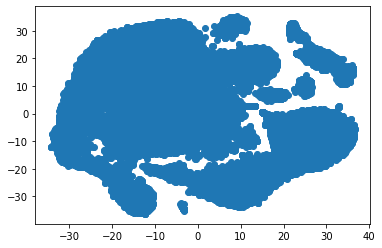

In [13]:
# Plot tSNE results
plt.scatter(s01_tsne[:, 0], s01_tsne[:, 1])

In [14]:
np.save("s01_tsne", s01_tsne)